In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Esercizio 7.1

Dato un set di misure della grandezza $O(t)$, la funzione di autocorrelazione $\chi(t)$ indica quanto sono correlate tali misure, ovvero quanto cambiano con il passare del tempo. In questo esercizio si vuole graficare la $\chi(t)$ e trovare il tempo di correlazione per parametri termodinamici di un ensemble classico di $N$ particelle classiche in un box.
Si simula un sistema cosiffatto nei tre stati della materia in unità di Lennard-Jones
- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

La dinamica è regolata dall'algorirmo di Metropolis. All'inizio della simulazione si è cercato un apposito passo in modo tale da avere l'accettenza circa del 50% (80% per il gas). Per ogni passo candidato, l'evoluzione del sistema è durata circa $10^2$ passi in modo tale da assicurarmi che l'algoritmo inizi a compionare nel modo corretto.<br>
Successivamente, si memorizza il passo cercato per poi far ripartire la simulazione e calcolare la funzione di autocorrelazione per le grandezze termodinamiche d'interesse.

Si riportano i tempi di correlazione ottenuti. <br>
Non mi aspetto valori troppo grandi perchè in ogni mossa il Metropolis cicla su tutte le particelle.
È stato aggiunto un fit espinenziale per mostrare l'andamento della $\chi(t)$.

In [3]:
x, y=np.loadtxt("./Es7.1./Es7.1.a./Solido/TempiDiCorrelazione", usecols=(0), unpack='true')
print("Fase solida")
print("TC potenziale: ", x, " TC pressione: ",y)
x, y=np.loadtxt("./Es7.1./Es7.1.a./Liquido/TempiDiCorrelazione", usecols=(0), unpack='true')
print("Fase liquida")
print("TC potenziale: ", x, " TC pressione: ",y)
x, y=np.loadtxt("./Es7.1./Es7.1.a./Gassoso/TempiDiCorrelazione", usecols=(0), unpack='true')
print("Fase gassosa")
print("TC potenziale: ", x, " TC pressione: ",y)

Fase solida
TC potenziale:  7.0  TC pressione:  7.0
Fase liquida
TC potenziale:  26.0  TC pressione:  46.0
Fase gassosa
TC potenziale:  9.0  TC pressione:  2.0


[0.92335507 0.13264845 0.01728328]
[0.92472181 0.1338197  0.016957  ]


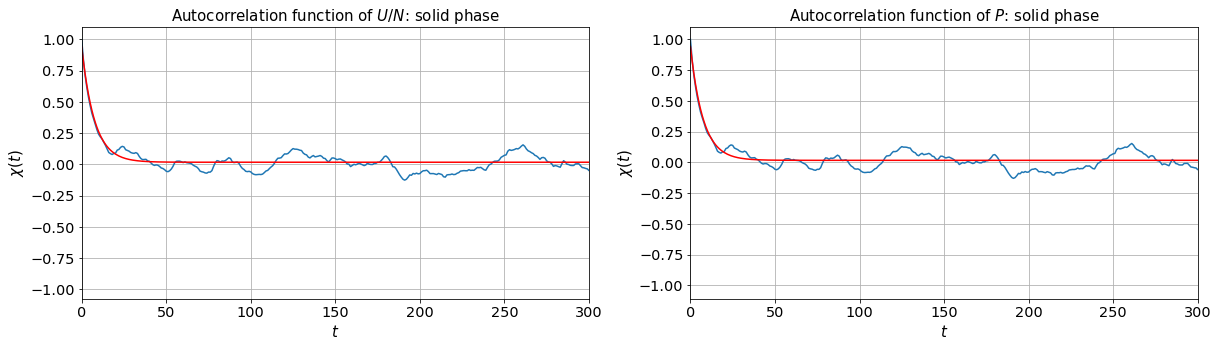

In [4]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Solido/CorrelazionePotenziale", usecols=(0,1), delimiter='  ', unpack='true')
f1.plot(x_data, y_data)
f1.set_xlabel('$t$',fontsize=15)
f1.set_ylabel('$\chi(t)$',fontsize=15)
f1.set_xlim(0,300)
f1.set_title('Autocorrelation function of $U/N$: solid phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

f1.plot(x_data, func(x_data, *popt),color="r")
f1.tick_params(axis='both', which='major', labelsize=14.5)
f1.grid(True)

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Solido/CorrelazionePressione", usecols=(0,1), delimiter='  ', unpack='true')
f2.plot(x_data, y_data)
f2.set_xlabel('$t$',fontsize=15)
f2.set_ylabel('$\chi(t)$',fontsize=15)
f2.set_xlim(0,300)
f2.set_title('Autocorrelation function of $P$: solid phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

f2.plot(x_data, func(x_data, *popt),color="r")
f2.tick_params(axis='both', which='major', labelsize=14.5)
f2.grid(True)
plt.show()


[0.49389051 0.01205676 0.0743343 ]
[0.51537783 0.01035884 0.08263663]


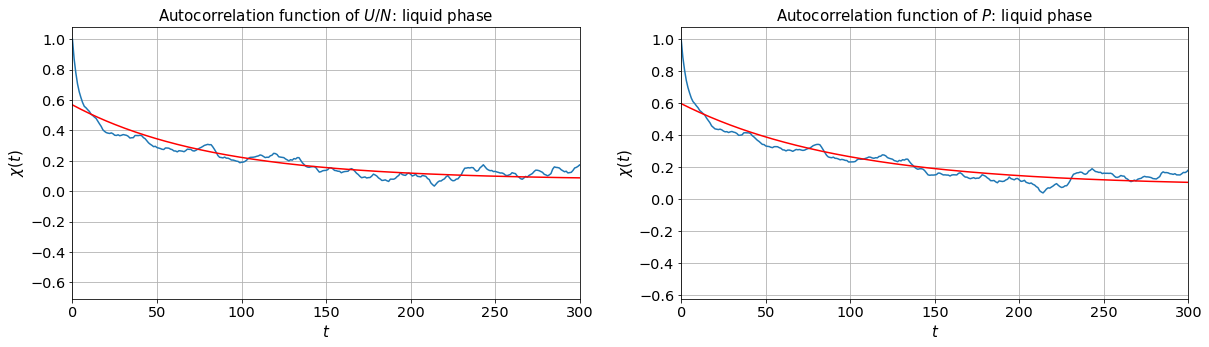

In [4]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Liquido/CorrelazionePotenziale", usecols=(0,1), delimiter='  ', unpack='true')
f1.plot(x_data, y_data)
f1.set_xlabel('$t$',fontsize=15)
f1.set_ylabel('$\chi(t)$',fontsize=15)
f1.set_xlim(0,300)
f1.set_title('Autocorrelation function of $U/N$: liquid phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)


f1.plot(x_data, func(x_data, *popt),color="r")
f1.tick_params(axis='both', which='major', labelsize=14.5)
f1.grid(True)

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Liquido/CorrelazionePressione", usecols=(0,1), delimiter='  ', unpack='true')
f2.plot(x_data, y_data)
f2.set_xlabel('$t$',fontsize=15)
f2.set_ylabel('$\chi(t)$',fontsize=15)
f2.set_xlim(0,300)
f2.set_title('Autocorrelation function of $P$: liquid phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

f2.plot(x_data, func(x_data, *popt),color="r")
f2.tick_params(axis='both', which='major', labelsize=14.5)
f2.grid(True)
plt.show()

[0.83127006 0.10135886 0.05177443]
[ 0.99970769  0.8375527  -0.00639979]


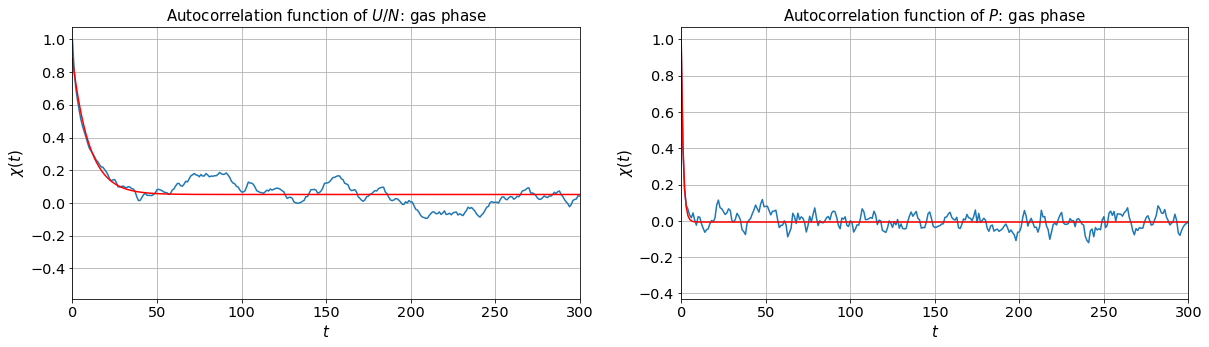

In [5]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Gassoso/CorrelazionePotenziale", usecols=(0,1), delimiter='  ', unpack='true')
f1.plot(x_data, y_data)
f1.set_xlabel('$t$',fontsize=15)
f1.set_ylabel('$\chi(t)$',fontsize=15)
f1.set_xlim(0,300)
f1.set_title('Autocorrelation function of $U/N$: gas phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

f1.plot(x_data, func(x_data, *popt),color="r")
f1.tick_params(axis='both', which='major', labelsize=14.5)
f1.grid(True)

x_data, y_data=np.loadtxt("./Es7.1./Es7.1.a./Gassoso/CorrelazionePressione", usecols=(0,1), delimiter='  ', unpack='true')
f2.plot(x_data, y_data)
f2.set_xlabel('$t$',fontsize=15)
f2.set_ylabel('$\chi(t)$',fontsize=15)
f2.set_xlim(0,300)
f2.set_title('Autocorrelation function of $P$: gas phase',fontsize=15)

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

f2.plot(x_data, func(x_data, *popt),color="r")
f2.tick_params(axis='both', which='major', labelsize=14.5)
f2.grid(True)
plt.show()

In tutti e tre gli stati (solido, liquido, gassoso), si può calcolare il tempo di correlazione che suggerisce quanto dovrebbero essere lunghi i blocchi in modo tale da avere delle grandezze abbastanza scorrelate.
Questo punto è importante poichè quando misuro una grandezza, voglio esplorare tutte le possibili configurazioni del sistema e, di conseguenza, tutte i valori ammessi per la grandezza d'interesse.


### **Errore blocchi **

Si vuole ora capire come variano gli errori dei valori di aspettazione di $U/N$ e $P$ al variare della dimensione del blocco da $L=M/N=10$ a $L=5\times 10^3$ per un numero di misure fissato pari a $10^5$. <br>
Per prendere delle misure bisogna prima equilibrare il sistema. A tale scopo, ho fatto evolvere il set di particelle per un multiplo del tempo di correlazione (ho preso il più grande tra quello del potenziale e pressione).
Successivamente ho implementato il metodo data-blocking per le grandezze d'interesse. Ho graficato l'ultimo errore del blocco contro la dimensione del blocco. Si osserva che dopo una breve crescita, il valore dell'errore rimane mediamente costante.

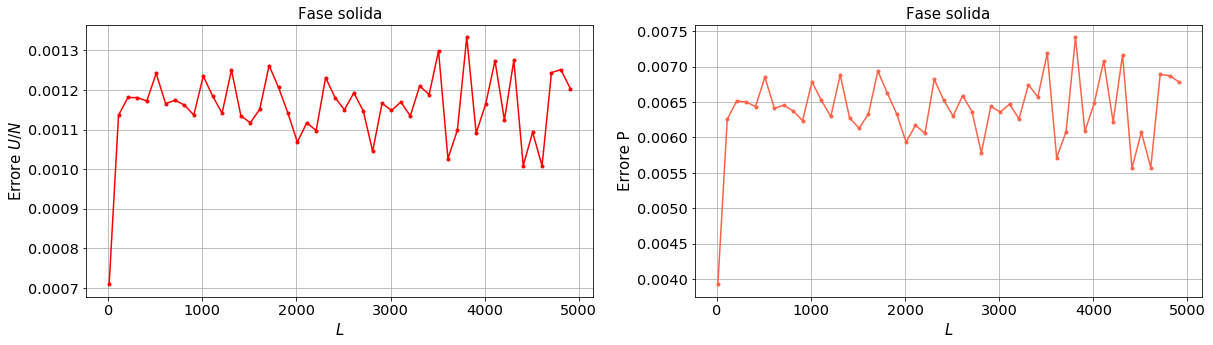

In [34]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

x, y=np.loadtxt("./Es7.1./Es7.1.b./Solido/output.epotLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f1.plot(x, y, marker=".",color="red")
f1.set_xlabel('$L$', fontsize=15)
f1.set_ylabel('Errore $U/N$', fontsize=15)
f1.set_title('Fase solida', fontsize=15)
f1.grid(True)
f1.tick_params(axis='both', which='major', labelsize=14.5)

x, y=np.loadtxt("./Es7.1./Es7.1.b./Solido/output.presLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f2.plot(x, y, marker=".",color="tomato")
f2.set_xlabel('$L$', fontsize=15)
f2.set_ylabel('Errore P', fontsize=15)
f2.set_title('Fase solida', fontsize=15)
f2.grid(True)
f2.tick_params(axis='both', which='major', labelsize=14.5)

plt.show()

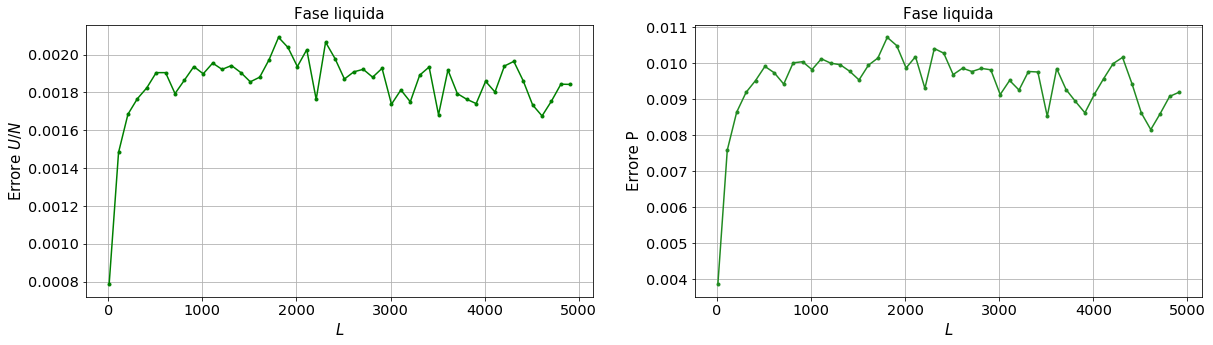

In [33]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

x,y=np.loadtxt("./Es7.1./Es7.1.b./Liquido/output.epotLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f1.plot(x,y, marker=".",color="green")
f1.set_xlabel('$L$', fontsize=15)
f1.set_ylabel('Errore $U/N$', fontsize=15)
f1.set_title('Fase liquida', fontsize=15)
f1.grid(True)
f1.tick_params(axis='both', which='major', labelsize=14.5)

x,y=np.loadtxt("./Es7.1./Es7.1.b./Liquido/output.presLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f2.plot(x,y, marker=".",color="forestgreen")
f2.set_xlabel('$L$', fontsize=15)
f2.set_ylabel('Errore P', fontsize=15)
f2.set_title('Fase liquida', fontsize=15)
f2.grid(True)
f2.tick_params(axis='both', which='major', labelsize=14.5)

plt.show()

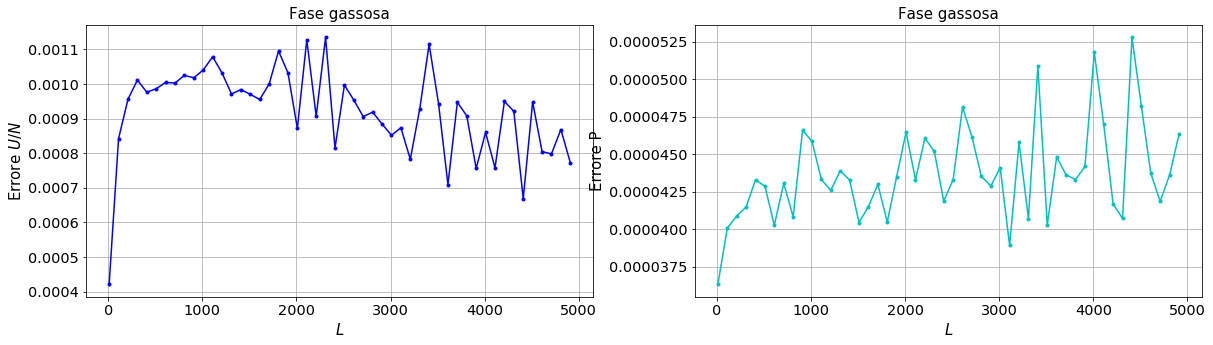

In [26]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(20,5))

x, y=np.loadtxt("./Es7.1./Es7.1.b./Gassoso/output.epotLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f1.plot(x,y,marker=".",color="blue")
f1.set_xlabel('$L$', fontsize=15)
f1.set_ylabel('Errore $U/N$', fontsize=15)
f1.set_title('Fase gassosa', fontsize=15)
f1.grid(True)
f1.tick_params(axis='both', which='major', labelsize=14.5)

x, y=np.loadtxt("./Es7.1./Es7.1.b./Gassoso/output.presLAST.0", usecols=(0,1), delimiter=' ', unpack='true')
f2.plot(x,y, marker=".",color="c")
f2.set_xlabel('$L$', fontsize=15)
f2.set_ylabel('Errore P', fontsize=15)
f2.set_title('Fase gassosa', fontsize=15)
f2.grid(True)
f2.tick_params(axis='both', which='major', labelsize=14.5)

plt.show()

### Esrcizio 7.2

Si definisce la funzione distribuzione radiale $g(r)$ come la probabilità di trovare un paio di atomi a distanza r, rispetto alla probabilità che si avrebbe nel caso un cui le particelle fossero distribuite in modo random con la stessa densità.
È definita come
$$
g^{(n)}_N( \vec r_1..\vec r_N)=\frac{\rho^{(n)}_N( \vec r_1..\vec r_N)}{\prod_{i=1}^N \rho^{(1)}_N( \vec r_i)}
$$
con $r \in \left[ 0; L/2\right]$.

Ho introdotto il calcolo della $g(r)$ nel codice Monte Carlo NVT e in quello di dinamica molecolare.

Tra i due codici ci sono delle profonde differenze:
- **Evoluzione del sistema**: MC NVT evolve con l'algoritmo di Metropolis, MD con quello di Verlet.
- **Fase di equilibrazione**: nel secondo caso si immerge diverse volte il sistema all'interno del bagno termico. Nel primo è sufficiente far evolvere il sistema per un multiplo del tempo di correlazione in modo tale che Metropolis possa iniziare a campionare nel modo giusto.

Gli errori sono piccoli rispetto alla scala con la quale varia la funzione quindi non si vedono.
Le funzioni per la fase liquida e solida ottenute attraverso i due codici sono compatibili.
La fase gassosa del MD presenta diversw fluttuazioni nella coda della funzione. Questo è dovuto al fatto che il sistema non si è equilibrato nel modo corretto. 

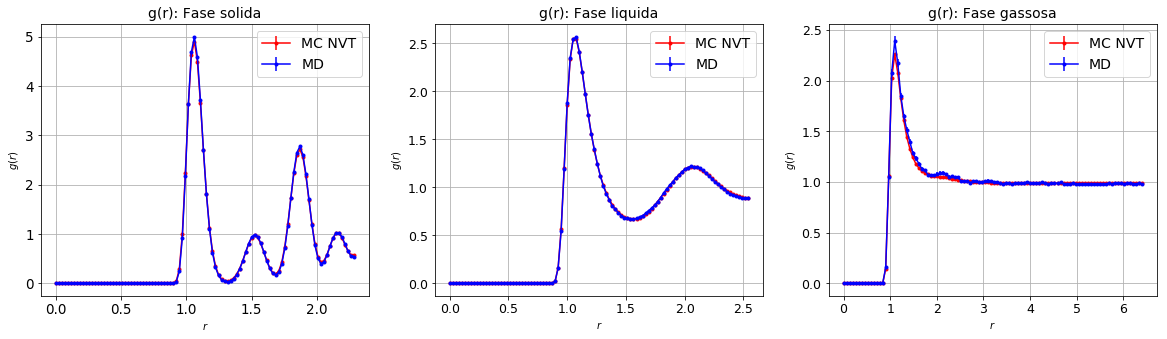

In [60]:
fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(20,5))

x, y, error=np.loadtxt("./Es7.2./Solido/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y, yerr=error, marker=".", label="MC NVT", color="r")
f1.set_xlabel("$r$")
f1.set_ylabel("$g(r)$")
x, y, error=np.loadtxt("./Es7.3./Solido/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y,yerr=error, marker=".", label="MD", color="b")
f1.set_title("g(r): Fase solida", fontsize=14)
leg = f1.legend(fontsize=14)
f1.tick_params(axis='both', which='major', labelsize=13.5)
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Liquido/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,y, yerr=error, marker=".", label="MC NVT", color="r")
f2.set_xlabel("$r$")
f2.set_ylabel("$g(r)$")
x, y, error=np.loadtxt("./Es7.3./Liquido/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,y,yerr=error, marker=".", label="MD", color="b")
f2.set_title("g(r): Fase liquida", fontsize=14)
leg = f2.legend(fontsize=14);
f2.tick_params(axis='both', which='major', labelsize=12.5)
f2.grid(True)

x, y, error=np.loadtxt("./Es7.2./Gassoso/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f3.errorbar(x,y,yerr=error, marker=".", label="MC NVT", color="r")
f3.set_xlabel("$r$")
f3.set_ylabel("$g(r)$")
x, y, error=np.loadtxt("./Es7.3./Gassoso/output.gofrFinale.dat", usecols=(0,1,2), unpack='true')
f3.errorbar(x,y,yerr=error, marker=".", label="MD", color="b")
f3.set_title("g(r): Fase gassosa", fontsize=14)
leg = f3.legend(fontsize=14);
f3.tick_params(axis='both', which='major', labelsize=12.5)
f3.grid(True)

plt.show()

Attraverso il codice MC NVT si graficano medie ed incertezze delle due grandezze d'interesse: pressione $P$ ed energia potenziale per particella $U/N$. Le simulazioni avvengono nelle seguenti condizioni
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ ( $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ ( $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ ( $r_c = 5.0$)

per un sistema di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu). I risultati sono ripostati al SI. 

Le figure ottenute convergono ad un certo valore. Questo segnala che il sistema si è equilibrato nel modo corretto. 
Si osserva che per la **fase solida**, le misure convergono ad un determinato valore che non è troppo distante per i due codici. La differenza si ha nella seconda decimale ma i risultati non sono comunque compatibili.
Per la **fase liquida**, i valori ottenuti sono compatibili.
Più interessante è la **fase gassosa**. Nel codice di dinamica molecolare tale fase non risce ad equilibrarsi mentre nel MD si osserva convergenza rispetto ad un certo valore.


In [88]:
kb=1.38*pow(10,-23)
epsilonAr=kb*120
epsilonKr=kb*164

sigmaAr=0.34*pow(10,-9)
sigmaKr=0.364*pow(10,-9)

In [53]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Solido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="r", label="MC NVT, Energia potenziale")
f1.set_xlabel("$N$)
f1.set_ylabel("$U/N$")
x, y, error=np.loadtxt("./Es7.3./Solido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="b", label="MD, Energia potenziale")
f1.set_title("Argon: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Solido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="r", label="MC NVT,Pressione")
f2.set_xlabel("$N$)
f2.set_ylabel("$P$")
x, y, error=np.loadtxt("./Es7.3./Solido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="b", label="MD,Pressione")
f2.set_title("Argon: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Solido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="r", label="MC NVT, Energia potenziale")
f1.set_xlabel("$N$)
f1.set_ylabel("$U/N$")
x, y, error=np.loadtxt("./Es7.3./Solido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="b", label="MD,Energia potenziale")
f1.set_title("Krypton: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Solido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="r", label="MC NVT, Pressione")
f2.set_xlabel("$N$)
f2.set_ylabel("$P$")
x, y, error=np.loadtxt("./Es7.3./Solido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="b", label="MD, Pressione")
f2.set_title("Krypton: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-53-defa9800ef8e>, line 5)

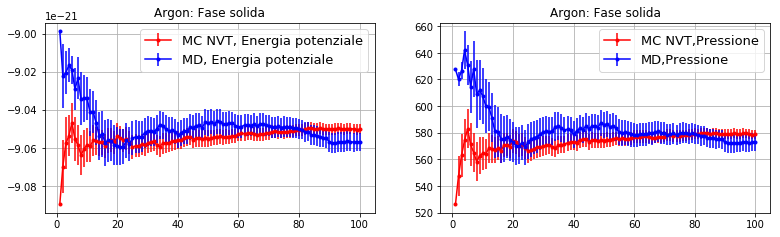

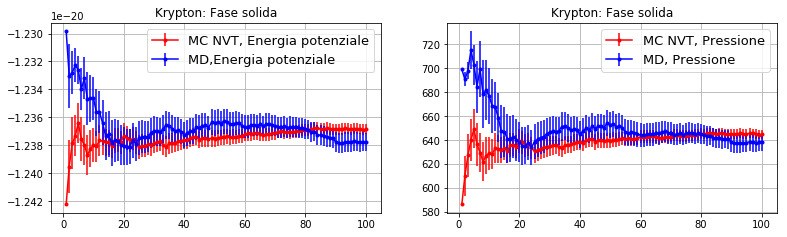

In [126]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Liquido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="r", label="MC NVT, Energia potenziale")
x, y, error=np.loadtxt("./Es7.3./Liquido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="b", label="MD, Energia potenziale")
f1.set_title("Argon: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Liquido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="r", label="MC NVT,Pressione")
x, y, error=np.loadtxt("./Es7.3./Liquido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="b", label="MD,Pressione")
f2.set_title("Argon: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Liquido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="r", label="MC NVT, Energia potenziale")
x, y, error=np.loadtxt("./Es7.3./Liquido/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="b", label="MD,Energia potenziale")
f1.set_title("Krypton: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Liquido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="r", label="MC NVT, Pressione")
x, y, error=np.loadtxt("./Es7.3./Liquido/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="b", label="MD, Pressione")
f2.set_title("Krypton: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

plt.show()

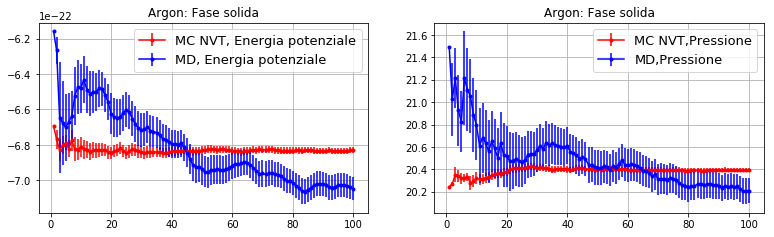

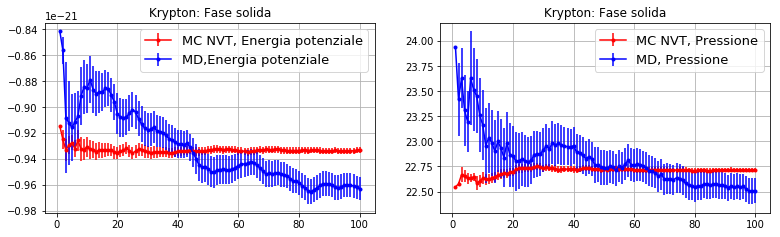

In [127]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Gassoso/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="r", label="MC NVT, Energia potenziale")
x, y, error=np.loadtxt("./Es7.3./Gassoso/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonAr, yerr=error*epsilonAr, marker=".", color="b", label="MD, Energia potenziale")
f1.set_title("Argon: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Gassoso/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="r", label="MC NVT,Pressione")
x, y, error=np.loadtxt("./Es7.3./Gassoso/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonAr)/((sigmaAr**3)*101300),yerr=(error*epsilonAr)/((sigmaAr**3)*101300), marker=".", color="b", label="MD,Pressione")
f2.set_title("Argon: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

fig, (f1, f2) = plt.subplots(1,2,figsize=(13,3.5))

x, y, error=np.loadtxt("./Es7.2./Gassoso/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="r", label="MC NVT, Energia potenziale")
x, y, error=np.loadtxt("./Es7.3./Gassoso/output.epot.dat", usecols=(0,1,2), unpack='true')
f1.errorbar(x,y*epsilonKr, yerr=error*epsilonKr, marker=".", color="b", label="MD,Energia potenziale")
f1.set_title("Krypton: Fase solida", fontsize=12)
leg = f1.legend(fontsize=13);
f1.grid(True)

x, y, error=np.loadtxt("./Es7.2./Gassoso/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="r", label="MC NVT, Pressione")
x, y, error=np.loadtxt("./Es7.3./Gassoso/output.pres.dat", usecols=(0,1,2), unpack='true')
f2.errorbar(x,(y*epsilonKr)/((sigmaKr**3)*101300),yerr=(error*epsilonKr)/((sigmaKr**3)*101300), marker=".", color="b", label="MD, Pressione")
f2.set_title("Krypton: Fase solida", fontsize=12)
leg = f2.legend(fontsize=13);
f2.grid(True)

plt.show()